<a href="https://colab.research.google.com/github/m-almarkhy/IT9002-202409434/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from time import time

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/IT9002_20249434/motor_data14-2018.csv', encoding = 'ISO-8859-1')

In [ ]:
display(data.shape)

(508499, 16)

In [ ]:
data.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-17,07-AUG-18,08,1202,519755.22,5097.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-16,07-AUG-17,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-15,07-AUG-16,08,1202,519755.22,6556.52,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-AUG-14,07-AUG-15,08,1202,519755.22,5102.83,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-17,07-AUG-18,08,1202,1400000.00,13304.87,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,NaN


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508499 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                508499 non-null  int64  
 1   INSR_BEGIN         508499 non-null  object 
 2   INSR_END           508499 non-null  object 
 3   EFFECTIVE_YR       508496 non-null  object 
 4   INSR_TYPE          508499 non-null  int64  
 5   INSURED_VALUE      508499 non-null  float64
 6   PREMIUM            508486 non-null  float64
 7   OBJECT_ID          508499 non-null  int64  
 8   PROD_YEAR          508436 non-null  float64
 9   SEATS_NUM          508404 non-null  float64
 10  CARRYING_CAPACITY  391665 non-null  float64
 11  TYPE_VEHICLE       508499 non-null  object 
 12  CCM_TON            508493 non-null  float64
 13  MAKE               508494 non-null  object 
 14  USAGE              508499 non-null  object 
 15  CLAIM_PAID         37772 non-null   float64
dtypes:

In [ ]:
data["TYPE_VEHICLE"].value_counts()

,count
TYPE_VEHICLE,
Motor-cycle,105977
Truck,94096
Pick-up,90151
Automobile,72971
Bus,65588
Station Wagones,35984
Trailers and semitrailers,21546
Special construction,8220
Tractor,7518


In [ ]:
data = data[data.TYPE_VEHICLE != "Tractor"]
data.shape

(500981, 16)

In [ ]:
# Count the occurrences of each make in the "MAKE" column
make_counts = data['MAKE'].value_counts().reset_index()
make_counts.columns = ['MAKE', 'PREMIUM']

# Select the top 10 values
top_10_premuim = make_counts.nlargest(10, 'PREMIUM')

# Plot using Plotly Express with different colors for each make
fig = px.bar(top_10_premuim, x='MAKE', y='PREMIUM', color='MAKE',
             labels={'MAKE': 'MAKE', 'PREMIUM': 'PREMIUM'},
             title='Top 10 PREMIUM of MAKE with Different Colors',
             text='PREMIUM',  # Specify the column for text annotations
             height=500)  # Adjust the height as needed

fig.update_xaxes(type='category')  # This ensures that the x-axis is treated as a category (make)
fig.update_traces(textposition='outside', texttemplate='%{text}')  # Position text outside the bars
fig.show()

In [ ]:
data["TYPE_VEHICLE"].value_counts()

,count
TYPE_VEHICLE,
Motor-cycle,105977
Truck,94096
Pick-up,90151
Automobile,72971
Bus,65588
Station Wagones,35984
Trailers and semitrailers,21546
Special construction,8220
Tanker,6437


In [ ]:
data['TYPE_VEHICLE'] = data.TYPE_VEHICLE.map({'Motor-cycle':0, 'Truck':1,'Pick-up':2,'Automobile':3,'Bus':4,'Station Wagones':5,'Trailers and semitrailers':6,'Special construction':7,'Tanker':8,'Trade plates':9}) # relevant is 1, not-relevant is 0
data = data[["USAGE","TYPE_VEHICLE"]] # taking text input and output variable as relevance
data = data[:1000]
data.shape

(1000, 2)

In [ ]:
data.head(15)

,USAGE,TYPE_VEHICLE
0,Own Goods,2
1,Own Goods,2
2,Own Goods,2
3,Own Goods,2
4,Own Goods,2
5,Own Goods,2
6,Own Goods,2
7,Own Goods,2
8,General Cartage,1
9,General Cartage,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
# download the stopwords corpus
nltk.download('stopwords')
# import stopwords
from nltk.corpus import stopwords
# print the english stopwords
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)
from nltk.corpus import stopwords

{'yourself', 'nor', 'it', 'a', 'will', "shan't", 'few', 'so', 'such', 'them', "don't", 'my', 'their', 'needn', 'hasn', 'those', "it's", 't', 'against', 'be', 'was', 'before', 'any', "couldn't", 'who', 'did', 'i', 'its', 'yourselves', 'd', 'how', "hasn't", 'mightn', 'themselves', 're', 'is', 'have', 'hers', 'during', 'theirs', 'weren', 'all', "needn't", 'with', "shouldn't", 'doing', 'to', 'does', 'your', 'haven', "that'll", "aren't", 'but', 'has', "doesn't", 'once', 'at', 'which', 'yours', 'in', 'these', 'ain', 'our', 'herself', 'doesn', 'until', 'mustn', 'wouldn', 'just', 'same', 'y', 'ourselves', 'couldn', 'had', 'don', "you'll", 'because', 'can', 'should', "mightn't", 'up', 'am', 'where', 'most', 've', 'between', "hadn't", 'what', 'by', 'both', 'this', 'her', 'when', 'than', 'him', "you've", 'now', 'more', 'down', 'ma', "weren't", 'were', 'too', 'about', 'o', 'she', 'ours', 'whom', 'his', 'll', 'won', 'no', 'are', 'me', 'after', 'very', 'while', 'over', 'we', 'into', 'there', 'own', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['USAGE']

,USAGE
0,Own Goods
1,Own Goods
2,Own Goods
3,Own Goods
4,Own Goods
...,...
1038,Private
1039,Private
1040,Private
1041,Private


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Tokenization on the 'USAGE' column
data['USAGE'] = data['USAGE'].fillna('')  # Replace NaN values with empty strings
data['USAGE_TOKENS'] = data['USAGE'].apply(word_tokenize)

# Display tokenized text
print(data[['USAGE', 'USAGE_TOKENS']].head())

       USAGE  USAGE_TOKENS
0  Own Goods  [Own, Goods]
1  Own Goods  [Own, Goods]
2  Own Goods  [Own, Goods]
3  Own Goods  [Own, Goods]
4  Own Goods  [Own, Goods]


In [ ]:
# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming
data['USAGE_STEMMED'] = data['USAGE_TOKENS'].apply(lambda x: [stemmer.stem(word) for word in x])

# Display stemmed text
print(data[['USAGE', 'USAGE_STEMMED']].head())

       USAGE USAGE_STEMMED
0  Own Goods   [own, good]
1  Own Goods   [own, good]
2  Own Goods   [own, good]
3  Own Goods   [own, good]
4  Own Goods   [own, good]


In [ ]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
data['USAGE_LEMMATIZED'] = data['USAGE_TOKENS'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display lemmatized text
print(data[['USAGE', 'USAGE_LEMMATIZED']].head())

       USAGE USAGE_LEMMATIZED
0  Own Goods     [Own, Goods]
1  Own Goods     [Own, Goods]
2  Own Goods     [Own, Goods]
3  Own Goods     [Own, Goods]
4  Own Goods     [Own, Goods]


In [ ]:
# Combine all text data into one string for vectorization
corpus = data['USAGE'].fillna('').tolist()

# Apply TF-IDF Vectorizer
tfidata_vectorizer = TfidfVectorizer(stop_words='english')
tfidata_matrix = tfidata_vectorizer.fit_transform(corpus)

# Convert to DataFrame for better visualization
tfidata_data = pd.DataFrame(tfidata_matrix.toarray(), columns=tfidata_vectorizer.get_feature_names_out())

# Display the top terms
print(tfidata_data.head())

   cartage  construction  fare  general  goods  passengers  paying  private  \
0      0.0           0.0   0.0      0.0    1.0         0.0     0.0      0.0   
1      0.0           0.0   0.0      0.0    1.0         0.0     0.0      0.0   
2      0.0           0.0   0.0      0.0    1.0         0.0     0.0      0.0   
3      0.0           0.0   0.0      0.0    1.0         0.0     0.0      0.0   
4      0.0           0.0   0.0      0.0    1.0         0.0     0.0      0.0   

   service  special  taxi  
0      0.0      0.0   0.0  
1      0.0      0.0   0.0  
2      0.0      0.0   0.0  
3      0.0      0.0   0.0  
4      0.0      0.0   0.0  


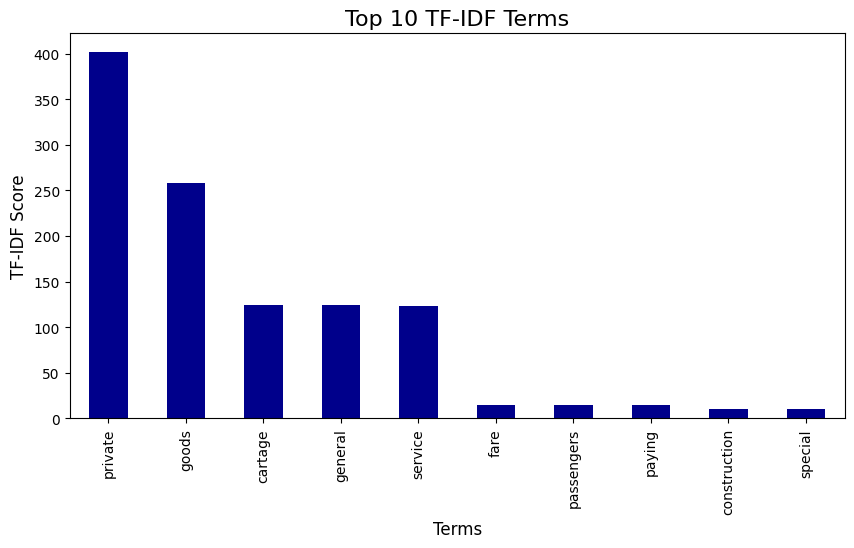

In [ ]:
# Get top 10 TF-IDF terms
top_terms = tfidata_data.sum(axis=0).sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 5))
top_terms.plot(kind='bar', color='darkblue')
plt.title("Top 10 TF-IDF Terms", fontsize=16)
plt.xlabel("Terms", fontsize=12)
plt.ylabel("TF-IDF Score", fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('stopwords')

# Load spacy model for NER
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply tokenization and POS tagging
data['USAGE_POS'] = data['USAGE'].apply(lambda x: pos_tag(word_tokenize(x)))

# Display POS tags for the first few rows
print(data[['USAGE', 'USAGE_POS']].head())

       USAGE                  USAGE_POS
0  Own Goods  [(Own, JJ), (Goods, NNS)]
1  Own Goods  [(Own, JJ), (Goods, NNS)]
2  Own Goods  [(Own, JJ), (Goods, NNS)]
3  Own Goods  [(Own, JJ), (Goods, NNS)]
4  Own Goods  [(Own, JJ), (Goods, NNS)]


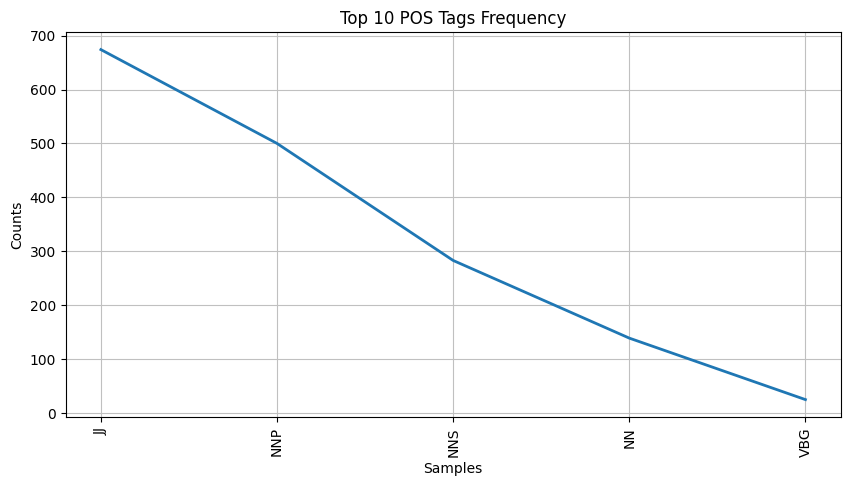

In [ ]:
# Extract all POS tags
all_pos_tags = [tag for row in data['USAGE_POS'] for word, tag in row]

# Count the frequency of each POS tag
pos_freq = nltk.FreqDist(all_pos_tags)

# Plot the POS tag frequencies
plt.figure(figsize=(10, 5))
pos_freq.plot(10, title="Top 10 POS Tags Frequency")
plt.show()

In [ ]:
# Apply NER using spaCy
def extract_named_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

data['USAGE_NER'] = data['USAGE'].apply(extract_named_entities)

# Display named entities for the first few rows
print(data[['USAGE', 'USAGE_NER']].head())

       USAGE USAGE_NER
0  Own Goods        []
1  Own Goods        []
2  Own Goods        []
3  Own Goods        []
4  Own Goods        []


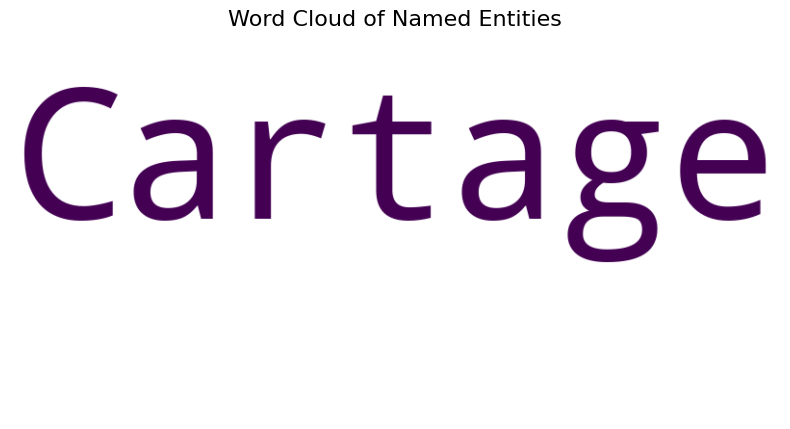

In [ ]:
# Combine all named entities into a single string
ner_text = ' '.join([' '.join([ent[0] for ent in ner]) for ner in data['USAGE_NER']])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ner_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Named Entities", fontsize=16)
plt.show()

In [ ]:
# Apply CountVectorizer for BoW representation
vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(data['USAGE'])

# Convert to DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the top 10 words
print(bow_df.sum().sort_values(ascending=False).head(10))

private         402
goods           258
cartage         176
general         176
service         123
fare             25
passengers       25
paying           25
construction     14
special          14
dtype: int64


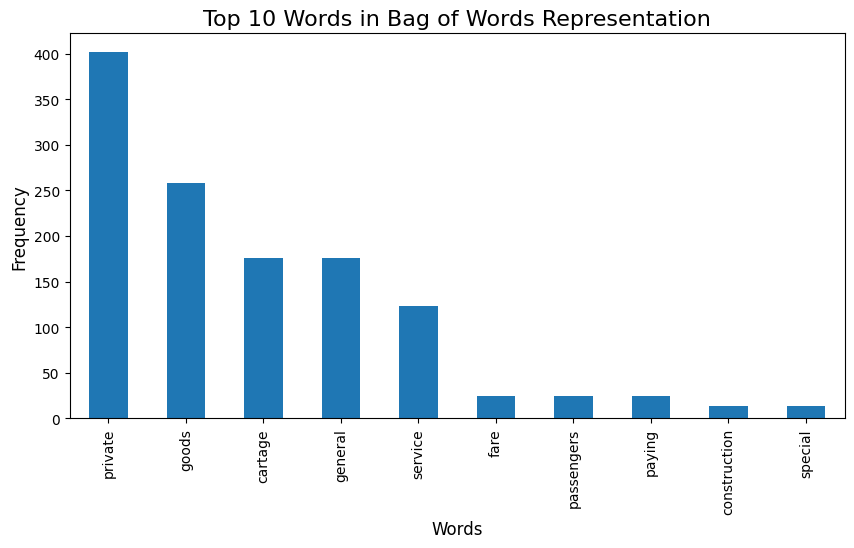

In [ ]:
# Plot the top 10 words
top_words = bow_df.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_words.plot(kind='bar')
plt.title("Top 10 Words in Bag of Words Representation", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:

data['USAGE'] = data['USAGE'].fillna('Unknown')  # Handle missing values

# Select features and target
X = data['USAGE']  # Textual data
y = data['USAGE']  # For simplicity, we're using USAGE as both input and target for demonstration (real case: use other features).

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test_tfidf)

Logistic Regression Classification Report:
                        precision    recall  f1-score   support

Fare Paying Passengers       1.00      1.00      1.00         5
       General Cartage       1.00      1.00      1.00        35
             Own Goods       1.00      1.00      1.00        52
           Own service       1.00      1.00      1.00        25
               Private       1.00      1.00      1.00        80
  Special Construction       1.00      1.00      1.00         3

              accuracy                           1.00       200
             macro avg       1.00      1.00      1.00       200
          weighted avg       1.00      1.00      1.00       200



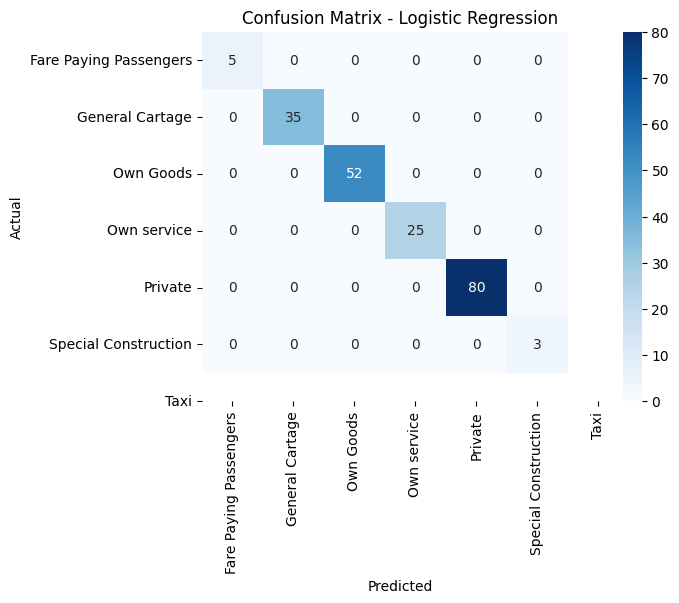

In [ ]:
# Evaluate performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_length = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [ ]:
# Build LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(y_train.unique()), activation='softmax')  # Number of classes in target
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert target variable to numeric
y_train_encoded = y_train.factorize()[0]
y_test_encoded = y_test.factorize()[0]

# Train the model
history = model.fit(
    X_train_pad, y_train_encoded,
    validation_data=(X_test_pad, y_test_encoded),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.3396 - loss: 1.7415 - val_accuracy: 0.4000 - val_loss: 1.5014
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.4122 - loss: 1.4878 - val_accuracy: 0.4000 - val_loss: 1.4967
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.3810 - loss: 1.4740 - val_accuracy: 0.4000 - val_loss: 1.5291
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.3848 - loss: 1.4682 - val_accuracy: 0.4000 - val_loss: 1.5566
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.4248 - loss: 1.4545 - val_accuracy: 0.4000 - val_loss: 1.5308
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.4187 - loss: 1.4357 - val_accuracy: 0.4000 - val_loss: 1.5166
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3725 - loss: 1.4542 - val_accuracy: 0.4000 - val_loss: 1.5239
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4053 - loss: 1.4643 - val_accuracy: 0.4000 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4458 - loss: 1.4522
LSTM Test Accuracy: 40.00%


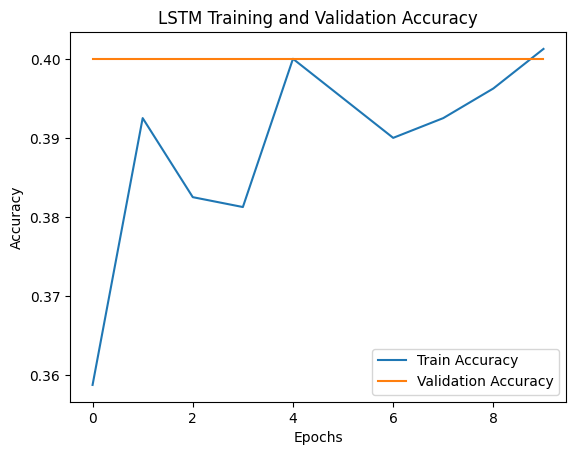

In [ ]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"LSTM Test Accuracy: {accuracy*100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Evaluation Metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1 Score: {f1_logreg:.2f}")

Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


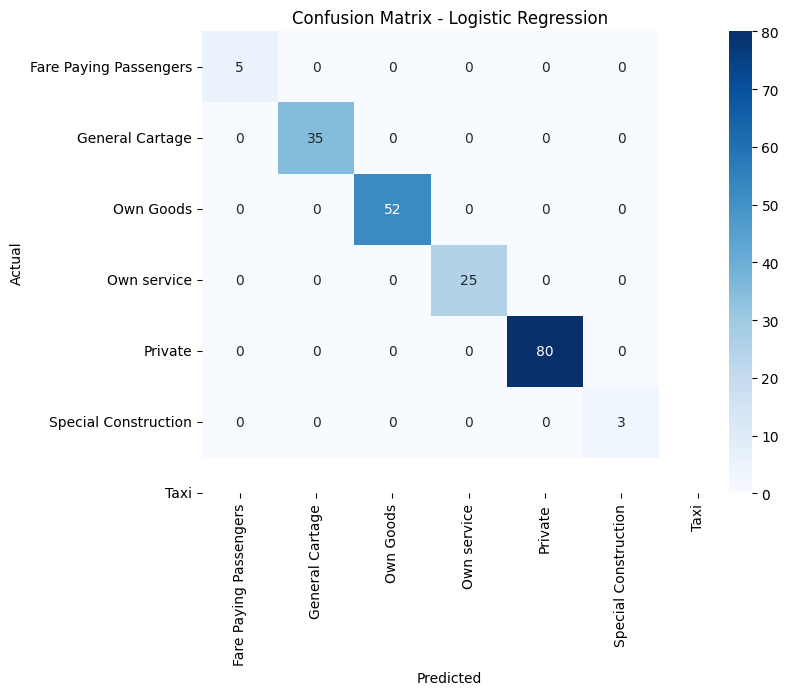

In [ ]:
# Plot Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# LSTM Evaluation Metrics
y_pred_lstm = model.predict(X_test_pad)  # Predict probabilities
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)  # Convert to class predictions

accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm_classes)
precision_lstm = precision_score(y_test_encoded, y_pred_lstm_classes, average='weighted')
recall_lstm = recall_score(y_test_encoded, y_pred_lstm_classes, average='weighted')
f1_lstm = f1_score(y_test_encoded, y_pred_lstm_classes, average='weighted')

print("LSTM Metrics:")
print(f"Accuracy: {accuracy_lstm:.2f}")
print(f"Precision: {precision_lstm:.2f}")
print(f"Recall: {recall_lstm:.2f}")
print(f"F1 Score: {f1_lstm:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
LSTM Metrics:
Accuracy: 0.40
Precision: 0.16
Recall: 0.40
F1 Score: 0.23


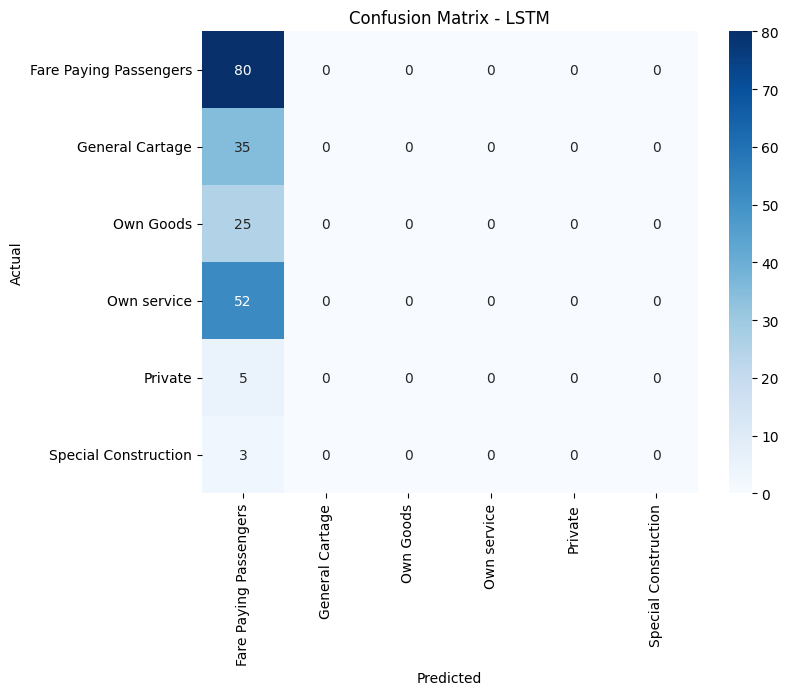

In [ ]:
# Plot Confusion Matrix
cm_lstm = confusion_matrix(y_test_encoded, y_pred_lstm_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

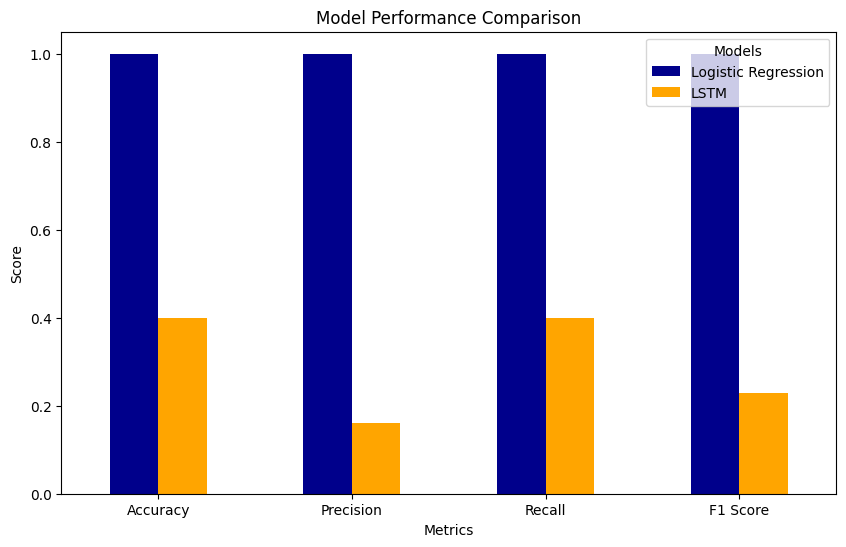

In [ ]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg],
    'LSTM': [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
})

# Plot the metrics
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['darkblue', 'orange'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.show()